## Сборный проект 1

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Задача: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год


### 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
from math import *

In [2]:
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
display(data_games.head(10))
data_games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод
Не хватает достаточно большого количества данных в столбце Rating, что затруднит обработку этих данных. Возможно были использованные старые базы, поскольку рейтинг проставляется обязательно до выпуска игры в мировую продажу. Но при анонсировании игры рейтинг может быть не проставлен.
Тоже самое относится к оценкам пользователей и критиков. На оценивание игры и выведения рейтинга нужно время и определенное количество пользователей. Соответственно базы данных с такими рейтингами постоянно обновляются. Возможно при выгрузке данных были допущены ошибки и большинство значений обратились в NaN. 
Так же в базе отмечены 2 игры без названия и 269 игр с неизвестным годом выпуска. Данные о названии игры восстановлению не подлежат. 


### 2. Подготовка данных

In [5]:
data_games.columns = data_games.columns.str.lower()
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
data_games.dropna(subset = ['year_of_release'], inplace = True)
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
data_games['year_of_release'] = pd.to_datetime(data_games['year_of_release'], format = '%Y').dt.year
data_games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

In [8]:
data_games['critic_score'] = data_games['critic_score'].fillna(0)
data_games['user_score'] = data_games['user_score'].fillna(0)
data_games['rating'] = data_games['rating'].fillna('Unknown')

In [9]:
data_games.query('user_score == "tbd"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,2007.450337,0.125539,0.043674,0.002782,0.015905,27.007155
std,3.484229,0.176593,0.112068,0.026395,0.039411,31.108604
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,0.070000,0.010000,0.000000,0.010000,0.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,60.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


tbd - 'to be discussed' - сокращение, которое часто используют для неопределенных оценок/баллов. В данном случае похоже, что tbd  оценка игры означает отсутствие оценок клиентов одной из рассматриваемых частей (в большинстве случаев, это продажи в Японии близки к 0, соответственно нет сформулированной оценки игры для японского сектора). Для последующей оценки влияния рейтинга на продажи 'tbd' будут заменены на 0 - в данном случае, это не низкий рейтинг, а отсутствие рейтинга. 

In [10]:
data_games['user_score'] = data_games['user_score'].replace('tbd', 0)
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors = 'coerce')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null float64
user_score         16446 non-null float64
rating             16446 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
data_games.duplicated().sum()

0

In [12]:
data_games['sum_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

### Вывод
Названия колонок приведены к нижнему регистру.
Удалены данные об играх без названия или годе выпуска игры. 
Пропуски в колонках critic_score и user_score заменены на 0. Статус рейтинга tbd заменен на 0 (оценка отсутствует)

Изменен тип данных для колонок:
- 'year_of_release' - на int (методом pd.to_datetime().dt.year)
- 'user_score' - на float (методом pd.to_numeric(errors = 'coerce'))

Дубликаты в данных не найдены. 

### 3. Исследовательский анализ данных

In [13]:
years_grouped = data_games.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'count').reset_index()

,year_of_release,sum_sales
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


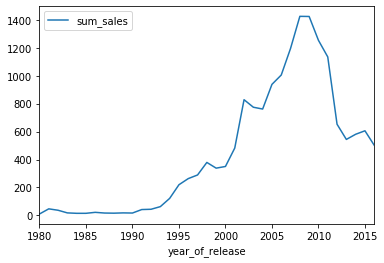

In [14]:
display(years_grouped)
list_of_years = list(years_grouped.query('year_of_release > 2011')['year_of_release'])
years_grouped.plot(x= 'year_of_release', y = 'sum_sales')

Данные до 2000 года можно объединить в одну группу, поскольку в то время игр выходило существенно меньше, чем в последующий период. Так же виден пик популярности игр - с 2005 по 2011 игр выходило существенно больше (больше 1000 игр за год).

In [15]:
platform_grouped = years_grouped = data_games.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'count')

In [16]:
platform_grouped.sort_values(by='sum_sales', ascending = False)


,sum_sales
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


In [17]:
platform_more_500 = platform_grouped.query('sum_sales > 100').reset_index()

In [18]:
list_popular_platform = list(platform_more_500['platform'])
list_popular_platform

['2600',
 '3DS',
 'DS',
 'GBA',
 'GC',
 'N64',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SNES',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

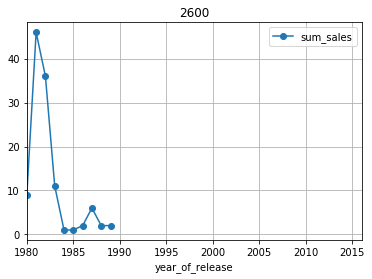

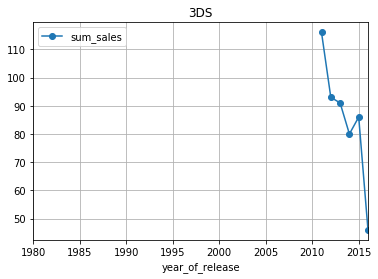

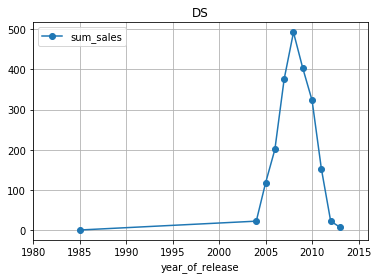

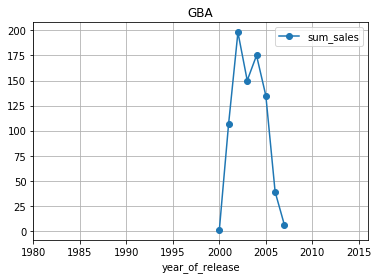

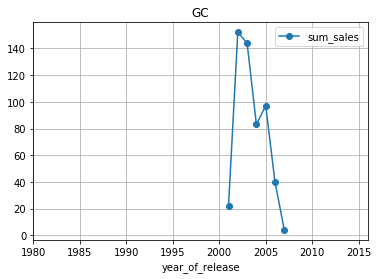

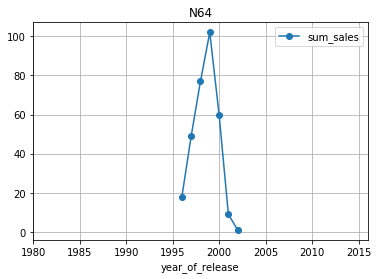

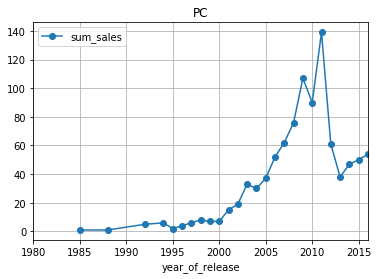

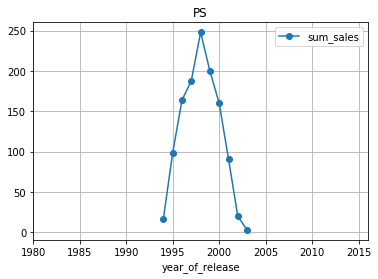

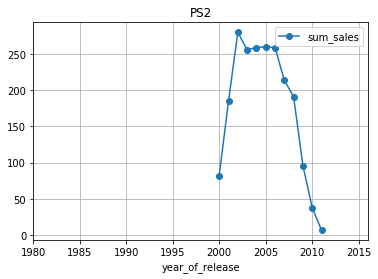

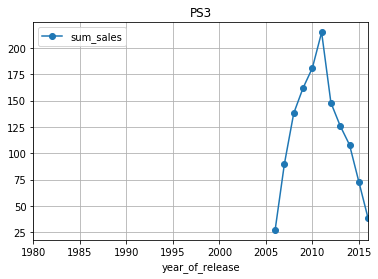

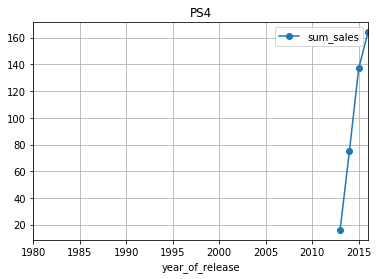

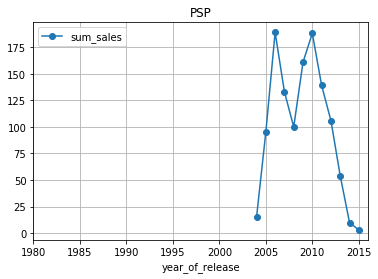

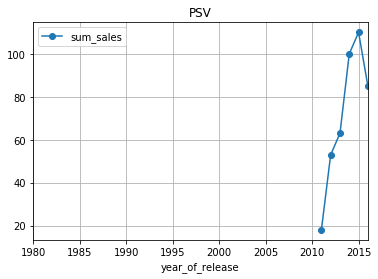

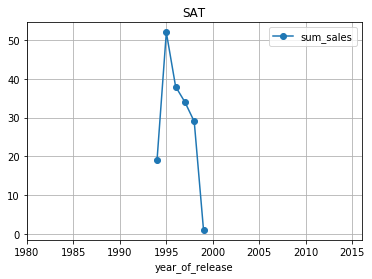

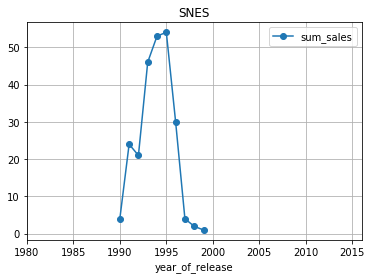

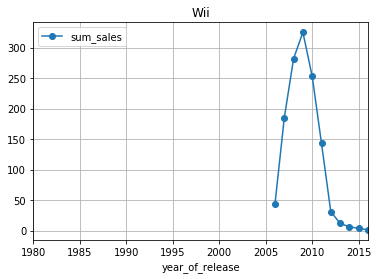

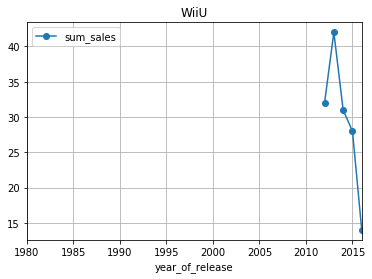

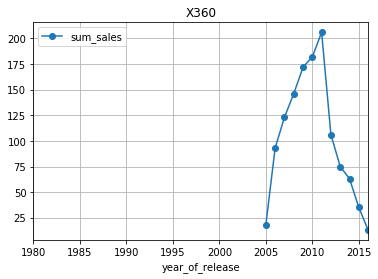

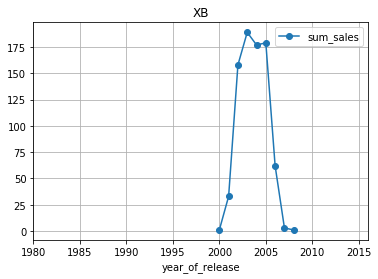

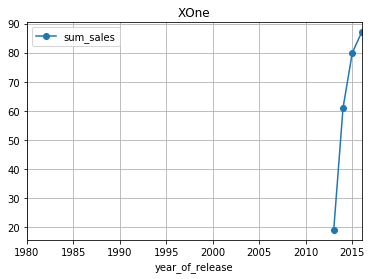

In [19]:
data_platform_year = data_games.query('platform in @list_popular_platform').pivot_table(index = ['year_of_release', 'platform'], values = 'sum_sales', aggfunc = 'count').reset_index()

for a in list_popular_platform:
    data_platform_year.loc[data_platform_year['platform'] == a].plot(x = 'year_of_release', y = 'sum_sales', xlim=(1980, 2016), title= a, style = 'o-', grid = True)

In [20]:
gr_data = data_games.groupby(['platform', 'year_of_release'])['sum_sales'].sum().reset_index()
report_data = data_games.query('platform in @list_popular_platform and year_of_release in @list_of_years')

In [21]:
gr_data.query('sum_sales > 0 and year_of_release > 2010').sort_values(by = 'year_of_release', ascending = False).head(10)

,platform,year_of_release,sum_sales
237,XOne,2016,26.15
224,X360,2016,1.52
152,PS3,2016,3.60
174,PSV,2016,4.25
118,PC,2016,5.25
212,WiiU,2016,4.60
207,Wii,2016,0.18
156,PS4,2016,69.25
17,3DS,2016,15.14
16,3DS,2015,27.78


In [22]:
years_of_life = gr_data.query('sum_sales > 0').groupby('platform')['year_of_release'].count()
years_of_life.median()

7.0

In [23]:
report_data.pivot_table(index = 'platform', values ='sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [24]:
display(report_data.query('year_of_release == 2016').pivot_table(index = 'platform', values ='sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False))
platform_list = ['XOne', 'PC', 'PS4', 'PS3', 'PSV', 'PC', 'X360', 'WiiU', '3DS']

,sum_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Две наиболее прибыльные платформы за последие 5 лет - PS4 и PS3. При этом PS3 находится на спаде продаж к 2016 году.
Есть потенциал роста у платформ XOne, PS4, WiiU (находятся на пике продаж в 2016 году), а так же PC и 3DS. (учитывая, что данные за 2016 год могут быть неполными). 3DC - относительно новая платформа - ее 5 лет существования еще не прошли. PC - намечается второй пик продаж, платформа, которая не устаревет и имеет потенциал для роста.
В 2016 году в отчет попали всего 9 платформ. Не рассмотренной осталась только Wii - продажи на этой платформе падают,она существует с 2006 года и соответственно находится на стадии угасания - нет причин считать ее перспективной для будующего года. 
Для итогового анализа остаются 8 платформ: 
- PS4
- XOne
- WiiU
- 3DS	
- PC	
- PS3
- PSV
- X360	

In [25]:
games_data = report_data.query('platform in @platform_list')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


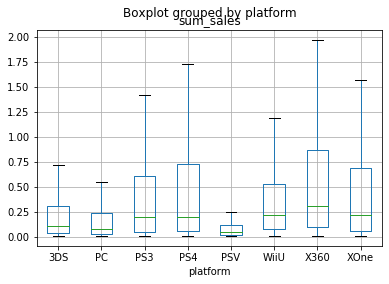

sum_sales       
              mean median
platform                 
3DS       0.491439   0.11
PC        0.250600   0.08
PS3       0.585781   0.20
PS4       0.801378   0.20
PSV       0.119659   0.05
WiiU      0.559116   0.22
X360      0.810068   0.31
XOne      0.645020   0.22

In [26]:
games_data.boxplot(column = 'sum_sales', by= 'platform', showfliers = False)
plt.show()
display(games_data.groupby('platform').agg({'sum_sales': ['mean', 'median']}))

По "ящику с усами" видно, что для 3DS и PC медиана продаж примерно похожа, в то время как у XOne, WiiU и X360 - очевидно выше, а так же разброс продаж между 1 и 3 квартилями очевидно больше. Boxplot для PC выглядит более компактным - усы короче, межквартильный интервал меньше, чем у остальных. Возможно, не стоит ждать рекордных доходов от данной платформы. Но стоит ожидать стабильных.
Видно, как вырвались вперед по продажам X360 (медиана выше, разброс больше, длинный хвост вверх), но эта же платформа угасают, судя по графикам продаж выше. Зато 2 другие платформы - XOne и PS4 - наоборот, имею потенциал для роста, не являются устаевшими, имеют медианные продажи  сопоставимые с одной из самых доходных за последние 5 лет платформ PS3.

In [27]:
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Unknown,0.01


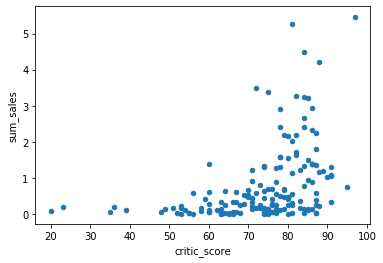

Коэффициент корреляции между доходом от продаж и critic_score 0.4104220356129637


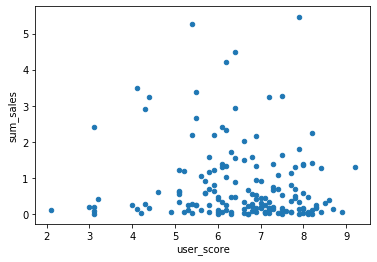

Коэффициент корреляции между доходом от продаж и user_score -0.09400318326920852


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc674dec10>,
      dtype=object)

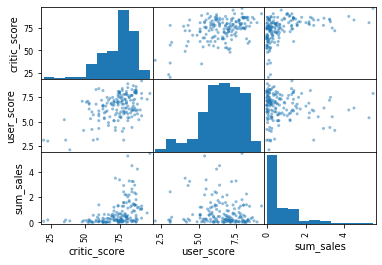

In [28]:
xone_data = games_data.query('platform == "XOne" and user_score != 0 and critic_score != 0')
scores = ['critic_score', 'user_score']
for column in scores:
    xone_data.plot(x = column, y = 'sum_sales', kind = 'scatter')
    plt.show()
    print('Коэффициент корреляции между доходом от продаж и', column, xone_data['sum_sales'].corr(xone_data[column]))                           
plotting_data = xone_data.loc[: , 'critic_score' : 'sum_sales']
pd.plotting.scatter_matrix(xone_data.loc[: , 'critic_score' : 'sum_sales'])

Для платформы XOne по данным диаграммам видно, что сильное влияние на продажи оценки пользователей не оказыают. Возможно, это связано с различием между пользователями разных секторов, протиоположное мнение об игре которых может занижать рейтинг игры. (коэффициент корреляции = -0.1) Веротно, что только очень низкие оценки пользователей будут влиять на покупаемость игры. Опять же рейтинг игроков, в отличии от рейтинга критиков формируется уже после выхода игры в релиз - соответственно по прошествии какого-то времени, когда основная покупка уже совершена. Скорее, эти оценки помогают сформировать запрос к будущим играм, чем реально повлиять на уже вышедшую игру. Тем более, когда речь идет не про онлайн, а офлайн - игра закончена и не развивается. 
Влияние оценки критиков более существенно - коэфициент корреляции = 0.41 - положительная корреляция между оценками критиков и продажами. Вероятнее всего, что только очень высокие оценки будут влиять на продажи. Средние оценки рейтинга не отзываются у пользователей (не ясно как перенести оценку 50 от эксперта на то, насколько пользователю понравится игра, и из-за чего игра не получила оценку 80)

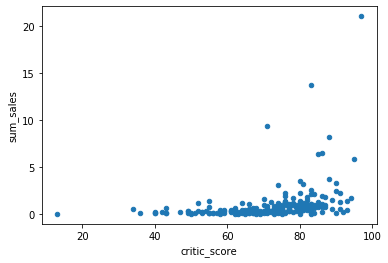

Коэффициент корреляции между доходом от продаж и critic_score 0.3310566175801407


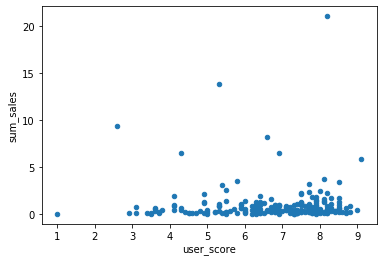

Коэффициент корреляции между доходом от продаж и user_score 0.0032274054930356904


In [29]:
ps3_data = games_data.query('platform == "PS3" and user_score != 0 and critic_score != 0')

for column in scores:
    ps3_data.plot(x = column, y = 'sum_sales', kind = 'scatter')
    plt.show()
    print('Коэффициент корреляции между доходом от продаж и', column, ps3_data['sum_sales'].corr(ps3_data[column]))  

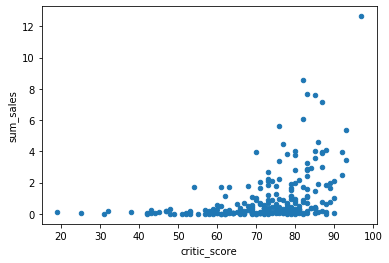

Коэффициент корреляции между доходом от продаж и critic_score 0.40589480145836687


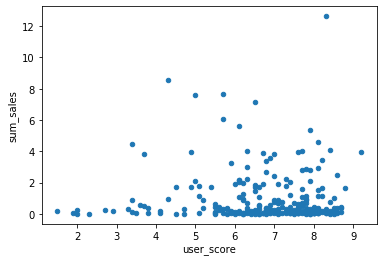

Коэффициент корреляции между доходом от продаж и user_score -0.03362497596528878


In [30]:
ps4_data = games_data.query('platform == "PS4" and user_score != 0 and critic_score != 0')

for column in scores:
    ps4_data.plot(x = column, y = 'sum_sales', kind = 'scatter')
    plt.show()
    print('Коэффициент корреляции между доходом от продаж и', column, ps4_data['sum_sales'].corr(ps4_data[column]))  

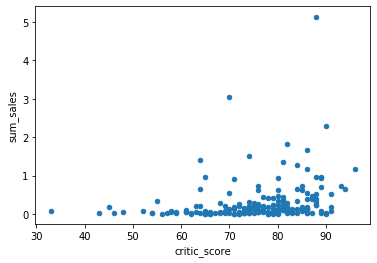

Коэффициент корреляции между доходом от продаж и critic_score 0.2360077361879236


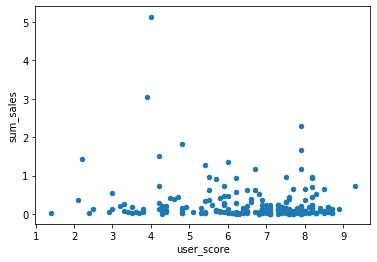

Коэффициент корреляции между доходом от продаж и user_score -0.1369335107338787


In [31]:
pc_data = games_data.query('platform == "PC" and user_score != 0 and critic_score != 0')

for column in scores:
    pc_data.plot(x = column, y = 'sum_sales', kind = 'scatter')
    plt.show()
    print('Коэффициент корреляции между доходом от продаж и', column, pc_data['sum_sales'].corr(pc_data[column])) 

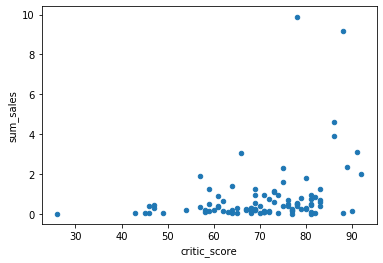

Коэффициент корреляции между доходом от продаж и critic_score 0.31055301915326294


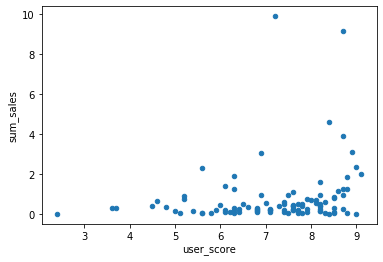

Коэффициент корреляции между доходом от продаж и user_score 0.2018125500765528


In [32]:
ds_data = games_data.query('platform == "3DS" and user_score != 0 and critic_score != 0')

for column in scores:
    ds_data.plot(x = column, y = 'sum_sales', kind = 'scatter')
    plt.show()
    print('Коэффициент корреляции между доходом от продаж и', column, ds_data['sum_sales'].corr(ds_data[column])) 

Выводы по влиянию оценок на продажи у XOne совпадают с теми, что можно сделать для РS4. А для платформ 3DS влияние оценок критиков и пользователей примерно одинаково.  PS3 влияние на продажи оценок пользователей несущественно (коэф.корреляции меньше 0.1). Для PC влияние и оценок критиков и оценок игроков одинаково слабое, но разнонаправленное. Возможно разница оценок пользователей из разных регионов дает такой эффект (коэф.корреляции между проджами и оценками пользователей = -0.13).

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


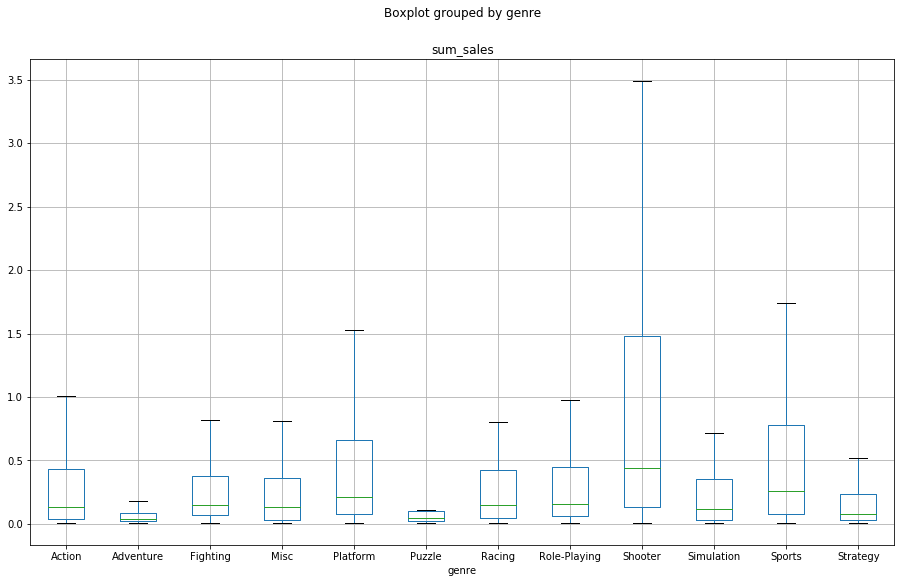

sum_sales               
                  mean median     sum
genre                                
Action        0.455783   0.13  424.79
Adventure     0.112286   0.04   27.51
Fighting      0.420286   0.15   44.13
Misc          0.401758   0.13   66.29
Platform      0.716790   0.21   58.06
Puzzle        0.179565   0.05    4.13
Racing        0.469211   0.15   53.49
Role-Playing  0.533680   0.16  179.85
Shooter       1.296723   0.44  304.73
Simulation    0.455658   0.12   34.63
Sports        0.712610   0.26  177.44
Strategy      0.187424   0.08   12.37

In [33]:
fig,ax = plt.subplots(figsize = (15, 9))
games_data.boxplot(column = 'sum_sales', by= 'genre', ax=ax, showfliers = False)
plt.show()

display(games_data.groupby('genre').agg({'sum_sales': ['mean', 'median', 'sum']}))


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


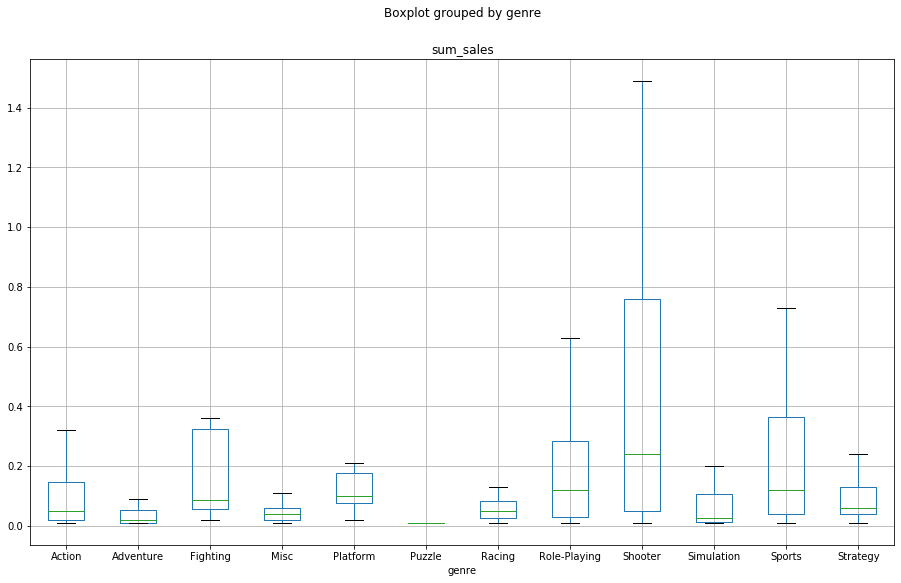

In [34]:
fig,ax = plt.subplots(figsize = (15, 9))
games_data.query('year_of_release == 2016').boxplot(column = 'sum_sales', by= 'genre', ax=ax, showfliers = False)
plt.show()

По данным графикам видно, что за последние 5 лет самые популярные игры - игры в жанрах 'Shooter', 'Sports' и 'Role-Playing'. Эти три жанра сохраняют популярность и в 2016 году. Но при этом добавляются еще и игры в жанре 'Action'. 
За 5 лет самые низкие продажы у игр в жанрах 'Puzzle' и 'Adventure'. При этом в 2016 году игр в жанре 'Puzzle' не выходило, а самые низкие показатели у игр в жанре 'Racing' и 'Misc', что может быть связано с количеcтвом и качеством игр в этих жанрах.

### Вывод 

В данных виден пик популярности игр - с 2005 по 2011 игр выходило существенно больше (больше 1000 игр за год). Для анализа можно брать последние 5 лет - с 2012 по 2016 год включительно - сопоставимое количество игр выходило за эти  годы от 502 до 653 игр за год).

За 7 лет в среднем появляются новые и исчезают старые платформы.

Две наиболее прибыльные платформы за последие 5 лет - PS4 и PS3. При этом PS3 находится на спаде продаж к 2016 году.
Есть потенциал роста у платформ XOne, PS4, WiiU (находятся на пике продаж в 2016 году), а так же PC и 3DS. (учитывая, что данные за 2016 год могут быть неполными). 3DC - относительно новая платформа - ее 5 лет существования еще не прошли. PC - намечается второй пик продаж, платформа, которая не устаревет и имеет потенциал для роста.
В 2016 году в отчет попали всего 9 платформ. Не рассмотренной осталась только Wii - продажи на этой платформе падают,она существует с 2006 года и соответственно находится на стадии угасания - нет причин считать ее перспективной для будующего года. 
Для итогового анализа остаются 8 платформ: 
- PS4
- XOne
- WiiU
- 3DS
- PC
- PS3
- PSV
- X360

 Для 3DS и PC медиана продаж примерно похожа, в то время как у XOne, WiiU и X360 - очевидно выше, а так же разброс продаж между 1 и 3 квартилями очевидно больше. Boxplot для PC выглядит более компактным - усы короче, межквартильный интервал меньше, чем у остальных. Возможно, не стоит ждать рекордных доходов от данной платформы. Но стоит ожидать стабильных. Видно, как вырвались вперед по продажам X360 (медиана выше, разброс больше, длинный хвост вверх), но эта же платформа угасают, судя по графикам продаж выше. Зато 2 другие платформы - XOne и PS4 - наоборот, имею потенциал для роста, не являются устаевшими, имеют медианные продажи сопоставимые с одной из самых доходных за последние 5 лет платформ PS3.
 
Для платформы XOne по данным диаграммам видно, что сильное влияние на продажи оценки пользователей не оказыают. Возможно, это связано с различием между пользователями разных секторов, протиоположное мнение об игре которых может занижать рейтинг игры. (коэффициент корреляции = 0.1) Веротно, что только очень низкие оценки пользователей будут влиять на покупаемость игры. 

Рейтинг игроков, в отличии от рейтинга критиков формируется уже после выхода игры в релиз - соответственно по прошествии какого-то времени, когда основная покупка уже совершена. Скорее, эти оценки помогают сформировать запрос к будущим играм, чем реально повлиять на уже вышедшую игру. Тем более, когда речь идет не про онлайн, а офлайн - игра закончена и не развивается. Влияние оценки критиков более существенно, но тоже слабое - коэфициент корреляции = 0.27 обозначает слабую положительную зависимость между оценко критиков и продажами. Вероятнее всего, что только очень высокие оценки будут влиять на продажи. Средние оценки рейтинга никак не отзываются у пользователей (не ясно как перенести оценку 50 от эксперта на то, насколько пользователю понравится игра, и из-за чего игра не получила оценку 80) 

Выводы по влиянию оценок на продажи у XOne совпадают с теми, что можно сделать для РS4. А для платформ 3DS влияние оценок критиков и пользователей примерно одинаково.  PS3 влияние на продажи оценок пользователей несущественно (коэф.корреляции меньше 0.1). Для PC влияние и оценок критиков и оценок игроков одинаково слабое, но разнонаправленное. Возможно разница оценок пользователей из разных регионов дает такой эффект (коэф.корреляции между проджами и оценками пользователей = -0.13).

### 4. Портрет пользователя каждого региона

na_sales
platform


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


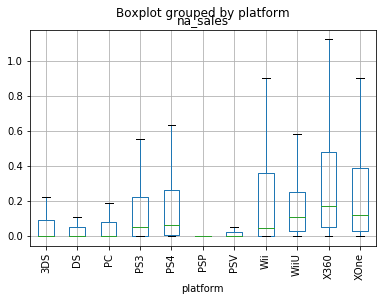

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


genre


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


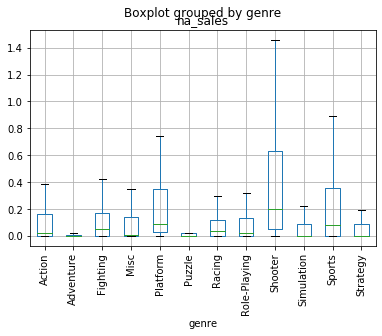

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


rating


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


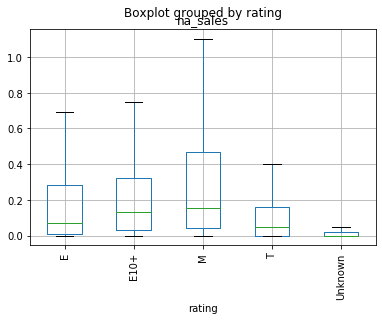

,na_sales
rating,
M,231.57
E,114.37
Unknown,103.31
E10+,75.70
T,66.02


eu_sales
platform


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


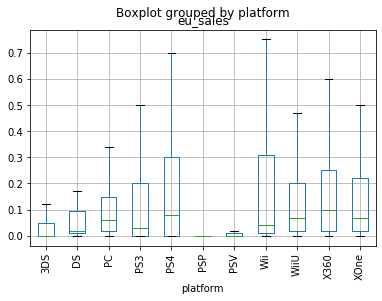

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


genre


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


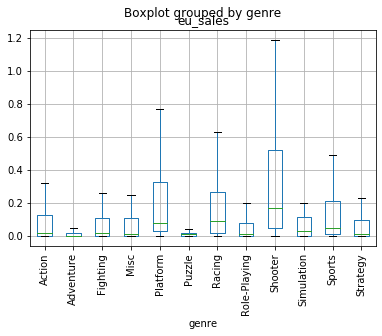

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


rating


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


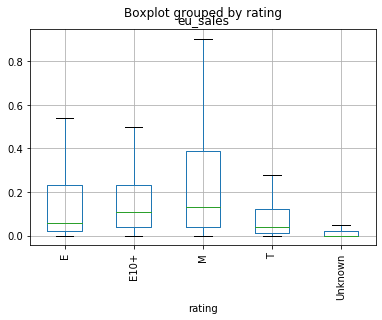

,eu_sales
rating,
M,193.96
E,113.03
Unknown,91.50
E10+,55.37
T,52.96


jp_sales
platform


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


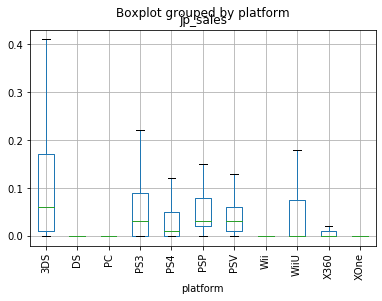

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


genre


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


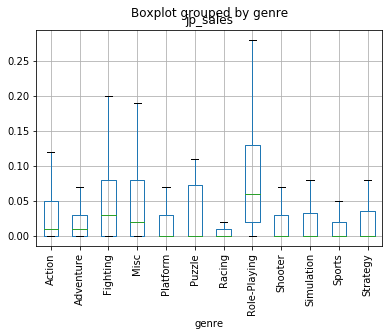

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


rating


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


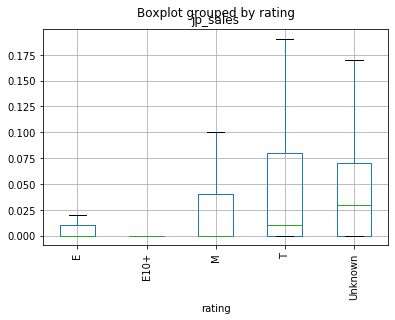

,jp_sales
rating,
Unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


In [35]:
parametrs = ['platform', 'genre', 'rating']
reg_list = ['na_sales', 'eu_sales', 'jp_sales']
for region in reg_list:
    print(region)
    for mem in parametrs:
        print(mem)
        report_data.boxplot(column = region, by= mem, showfliers = False)
        plt.xticks(rotation=90)
        plt.show()
        common = report_data.pivot_table(index = mem, values = region, aggfunc = 'sum')
        display(common.sort_values(by = region, ascending = False).head())

### Вывод


Портрет пользователей региона: 

NA
- самые популярные платформы: X360, PS4, PS3, XOne, 3DS
- самые популярные жанры: Action, Shooter, Sports, Role-Playing, Misc
- больше всего получено от  продажи игр с рейтингом "М" (рейтинг "Е" уступает в два раза по суммарным продажам - на 117 миллиона меньше продаж).


EU
- самые популярные платформы:PS4, PS3, X360, XOne, 3DS (X360 существенно уступает PS3)	
- самые популярные жанры: Action, Shooter, Sports,  Role-Playing, Racing ( Misc уступило 5 место в топ-5 для европейского сектора в пользу Racing)
- больше всего получено от  продажи игр с рейтингом "М" (рейтинг "Е" принес меньше на примерно 80 миллионов).


JP
- самые популярные платформы: 3DSб, PS3, PSV, PS4, WiiU	
- самые популярные жанры: Role-Playing, Action, Misc, Simulation, Fighting	(предпочитаемые жанры существенно отличаются от пользователей NA и EU секторов)
- больше всего получено от  продажи игр с неопределенным рейтингом (рейтинг "Е" принес меньше на примерно 100 миллионов). Поэтому сказать точно о предпотениях сектора сложно.

Из полученных данных следует, что сектора NA и EU  имеют много общего судя по предпочтениям пользователей. И сильно отличаются от пользователей JP сектора. Здесь и технические возможности, и другие предпочитаемые жанры игр (скорее влияние разности менталитета, другая культура)

### 5. Проверка гипотез


#### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (H0)
Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC различаются (H1)

In [36]:
display(games_data.query('platform == "XOne" and user_score !=0')['user_score'].describe())
games_data.query('platform == "PC" and user_score !=0')['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [37]:
results1 = st.ttest_ind(games_data.query('platform == "XOne" and user_score !=0')['user_score'], games_data.query('platform == "PC" and user_score !=0')['user_score'])
alpha = .05
print('р-значение', results1.pvalue)
if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(games_data.query('platform == "XOne" and user_score !=0')['user_score'].mean())
print(games_data.query('platform == "PC" and user_score !=0')['user_score'].mean())

р-значение 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу
6.521428571428572
6.4286407766990274


Существует вероятность, что средняя оценка пользователей платформ Xone  и PC одинаковы. Данные по нашей выборке этому не противоречат. Медианное значение пользовательского рейтинга равны, а средние отличаются на 0.1 балл. 

Для оценки распределения оценок пользователей по платформам используем метод st.ttest_ind(), поскольку выборка в обоих случаях больше 50, и выборки не пересекаются между собой - предполагаю, что пользователи пользуются только одной платформой для одной игры. 

#### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports одинаковые (H0)
Альтернативная: Средние пользовательские рейтинги жанров Action и Sports различаются (H1)

In [38]:
display(games_data.query('genre == "Action" and user_score !=0')['user_score'].describe())
games_data.query('genre == "Sports" and user_score !=0')['user_score'].describe()

count    513.000000
mean       6.845224
std        1.346473
min        2.000000
25%        6.300000
50%        7.200000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    190.000000
mean       5.458421
std        1.739612
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [39]:
results1 = st.ttest_ind(games_data.query('genre == "Action" and user_score !=0')['user_score'], games_data.query('genre == "Sports" and user_score !=0')['user_score'], equal_var= False)
alpha = .05
print('р-значение', results1.pvalue)
if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    
print(games_data.query('genre == "Action" and user_score !=0')['user_score'].median())
print(games_data.query('genre == "Sports" and user_score !=0')['user_score'].median())


р-значение 4.105960298744514e-20
Отвергаем нулевую гипотезу
7.2
5.75


Средние пользовательский рейтинг игр жанров Action и Sports отличаются. Исходя из анализируемых данных, медианная оценка жанра "Action" - 7.2, а жанра "Sports" - 5.75. 

Для оценки распределения оценок пользователей по жанрам используем метод st.ttest_ind(), поскольку выборка в обоих случаях больше 50, и выборки не пересекаются между собой - предполагаю, что пользователи предпочитают только один жанр игры (две генеральные совокупности).


## 5. Общий вывод 
 Не хватает достаточно большого количества данных в столбце Rating, что затруднит обработку этих данных. Возможно были использованные старые базы, поскольку рейтинг проставляется обязательно до выпуска игры в мировую продажу. Но при анонсировании игры рейтинг может быть не проставлен. Тоже самое относится к оценкам пользователей и критиков. На оценивание игры и выведения рейтинга нужно время и определенное количество пользователей. Соответственно базы данных с такими рейтингами постоянно обновляются. Возможно при выгрузке данных были допущены ошибки и большинство значений обратились в NaN. Так же в базе отмечены 2 игры без названия и 269 игр с неизвестным годом выпуска. Данные о названии игры восстановлению не подлежат.
 
 Названия колонок приведены к нижнему регистру. Удалены данные об играх без названия или годе выпуска игры. Пропуски в колонках critic_score и user_score заменены на 0. Статус рейтинга tbd заменен на 0 (оценка отсутствует)

Изменен тип данных для колонок:

'year_of_release' - на int 
'user_score' - на float
Дубликаты в данных не найдены.

При исследовании данных выявлено:
В данных виден пик популярности игр - с 2005 по 2011 игр выходило существенно больше (больше 1000 игр за год). 
Для анализа взяты последние 5 лет - с 2012 по 2016 год включительно - сопоставимое количество игр выходило за эти  годы от 502 до 653 игр за год).

За 7 лет в среднем появляются новые и исчезают старые платформы.

Две наиболее прибыльные платформы за последие 5 лет - PS4 и PS3. При этом PS3 находится на спаде продаж к 2016 году.
Есть потенциал роста у платформ XOne, PS4, WiiU (находятся на пике продаж в 2016 году), а так же PC и 3DS. (учитывая, что данные за 2016 год могут быть неполными). 3DC - относительно новая платформа - ее 5 лет существования еще не прошли. PC - намечается второй пик продаж, платформа, которая не устаревет и имеет потенциал для роста.
В 2016 году в отчет попали всего 9 платформ. Не рассмотренной осталась только Wii - продажи на этой платформе падают,она существует с 2006 года и соответственно находится на стадии угасания - нет причин считать ее перспективной для будующего года. 
Для итогового анализа остаются 8 платформ: 
- PS4
- XOne
- WiiU
- 3DS
- PC
- PS3
- PSV
- X360



 Вырвались вперед по продажам X360 (медиана выше, разброс больше, длинный хвост вверх), но эта же платформа угасает, судя по графикам продаж выше. 
 XOne и PS4 -  имею потенциал для роста, не являются устаевшими, имеют медианные продажи сопоставимые с одной из самых доходных за последние 5 лет платформ PS3. 
 Так же заметен рост для платформы PC - не ожидается огромного роста, но остается популярной в течение многих лет, отмечен рост продаж за последние 2 года.
 
Для платформы XOne по данным диаграммам видно, что сильное влияние на продажи оценки пользователей не оказыают. Возможно, это связано с различием между пользователями разных секторов, протиоположное мнение об игре которых может занижать рейтинг игры. (коэффициент корреляции = 0.1) Веротно, что только очень низкие оценки пользователей будут влиять на покупаемость игры. 

Рейтинг игроков, в отличии от рейтинга критиков формируется уже после выхода игры в релиз - соответственно по прошествии какого-то времени, когда основная покупка уже совершена. Скорее, эти оценки помогают сформировать запрос к будущим играм, чем реально повлиять на уже вышедшую игру. Тем более, когда речь идет не про онлайн, а офлайн - игра закончена и не развивается. Влияние оценки критиков более существенно.  Вероятнее всего, что только очень высокие оценки будут влиять на продажи. Средние оценки рейтинга не отзываются у пользователей (не ясно как перенести оценку 50 от эксперта на то, насколько пользователю понравится игра, и из-за чего игра не получила оценку 80) 

В целом от платформы к платформе влияние критиков на продажи умеренно положительное. При этом влияние пользовательских оценок на продажи слабое и варьируется от платформы к платформе. 

За последние 5 лет самые популярные игры - игры в жанрах 'Shooter', 'Sports' и 'Role-Playing'. Эти три жанра сохраняют популярность и в 2016 году. Но при этом добавляются еще и игры в жанре 'Action'. За 5 лет самые низкие продажы у игр в жанрах 'Puzzle' и 'Adventure'. При этом в 2016 году игр в жанре 'Puzzle' не выходило, а самые низкие показатели у игр в жанре 'Racing' и 'Misc', что может быть связано с количеcтвом и качеством игр в этих жанрах.

При продажах учитывать следующие особенности пользователей региона (особоенно при планировании продаж в JP секторе):

NA

- самые популярные платформы: X360, PS4, PS3, XOne, 3DS
- самые популярные жанры: Action, Shooter, Sports, Role-Playing, Misc
- больше всего получено от продажи игр с рейтингом "М" (рейтинг "Е" уступает в два раза по суммарным продажам - на 117 миллиона - меньше продаж).

EU

- самые популярные платформы:PS4, PS3, X360, XOne, 3DS (X360 существенно уступает PS3)
- самые популярные жанры: Action, Shooter, Sports, Role-Playing, Racing ( Misc уступило 5 место в топ-5 для европейского сектора в пользу Racing)
- больше всего получено от продажи игр с рейтингом "М" (рейтинг "Е" принес меньше на примерно 80 миллионов).

JP

- самые популярные платформы: 3DSб, PS3, PSV, PS4, WiiU
- самые популярные жанры: Role-Playing, Action, Misc, Simulation, Fighting (предпочитаемые жанры существенно отличаются от пользователей NA и EU секторов)
- больше всего получено от продажи игр с неопределенным рейтингом (рейтинг "Е" принес меньше на примерно 100 миллионов). Поэтому сказать точно о предпотениях сектора сложно.


Из полученных данных следует, что сектора NA и EU имеют много общего судя по предпочтениям пользователей. И сильно отличаются от пользователей JP сектора. Здесь и технические возможности, и другие предпочитаемые жанры игр (скорее влияние разности менталитета, другая культура)

Проверка гипотез показала, что:
Существует вероятность, что средняя оценка пользователей платформ Xone и PC одинаковы. Данные по нашей выборке этому не противоречат. Медианное значение пользовательского рейтинга равны, а средние отличаются на 0.1 балл.
Средние пользовательский рейтинг игр жанров Action и Sports отличаются. Исходя из анализируемых данных, медианная оценка жанра "Action" - 7.2, а жанра "Sports" - 5.75.



##### При планировании компании на 2017 год учитывать:
    Популярные платформы, имеющие шанс на рост: 
    - XOne
    - PS4
    - WiiU (для JP региона)
    
    
    Самая стабильная платформа, с потенциалом роста:
    - PC
   
   
   Самые популярные жанры игр, общие для всех регионов:
    -Action
    -Role-Playing
   
   Умеренное положительное влияние на продажи оказывают оценки критиков. 
   Обратить внимание на индивидуальные особенности JP сектора - сильно отличается для EU и NA
   Пользователи выше оценивают игры жанра Action 